## Assignment
We first read the csv file and try to find the unqiue values of columns

In [1]:
import pandas as pd
#reading main data file. when resources constrained, we could use the chunksize option of read_csv
main_df = pd.read_csv("coding_challenge.csv")
main_df

,guid,trade,classification_pl,classification_faces,classification_coverage,classification_spread_v1,classification_spread_and_density,classification_spread_or_density,label
0,30HuwqWE50B9F09miqeGJO,Architectural,BC,NB,BC,BC,BC,BC,BC
1,1BAQmX_MX0tv9g_SVQh_Sb,MEP,NB,NB,BC,BC,NB,BC,BC
2,1BAQmX_MX0tv9g_SVQh_Sv,MEP,NB,NB,NB,BC,NB,BC,BC
3,1BAQmX_MX0tv9g_SVQh_Sz,MEP,NB,NB,BC,BC,NB,BC,BC
4,1BAQmX_MX0tv9g_SVQh_SA,MEP,NB,NB,BC,BC,NB,BC,BC
...,...,...,...,...,...,...,...,...,...
64068,0_detoZ7XFVuafxAMV7ZsX,MEP,NPC,NaN,NaN,NaN,NaN,NaN,NB
64069,0_detoZ7XFVuafxAMV7Zsa,MEP,NPC,NaN,NaN,NaN,NaN,NaN,NB
64070,3zsdyNKAX0HAJXgicD4qlq,MEP,BC,NB,BC,BC,NB,BC,BC
64071,1b$obD43PE3x_m9lf1jM2O,MEP,NB,NB,NB,BC,NB,BC,OOT


In [2]:
print(main_df.trade.unique(),main_df.label.unique())

['Architectural' 'MEP' 'Structural'] ['BC' 'NB' 'OOT']


A lot of NaN values seen. Another class seen in classificaiton_pl's output : NPC. We see that The NaN/NPC classes have the exact same count across all classifiers i.e The classifiers either al predict a class or all predict a NULL class. Since we are comparing the classifiers with each other, we could get rid of the cases where none of the classifiers predict a class

In the next cell we take a closer look at the distribution of trades and labels

In [3]:
import numpy as np
entries = len(main_df.index)
main_df = main_df.replace(np.nan, 'NUL')
main_df = main_df.replace('NPC','NUL' )
for col in main_df.columns[1:]:
    unique_value_list = main_df[col].unique()
    print('\nUnique Values of column :',col,' : ',unique_value_list)
    for val in unique_value_list:
        c = (main_df[col].values == val).sum()
        print(val,':',c,'    Percentage:',c/entries*100 )
    




Unique Values of column : trade  :  ['Architectural' 'MEP' 'Structural']
Architectural : 22200     Percentage: 34.647979648213756
MEP : 41601     Percentage: 64.92750456510544
Structural : 272     Percentage: 0.42451578668081713

Unique Values of column : classification_pl  :  ['BC' 'NB' 'OOT' 'NUL']
BC : 3359     Percentage: 5.242457821547298
NB : 12621     Percentage: 19.697844645950713
OOT : 11     Percentage: 0.01716791784370952
NUL : 48082     Percentage: 75.04252961465828

Unique Values of column : classification_faces  :  ['NB' 'BC' 'OOT' 'NUL']
NB : 14183     Percentage: 22.135688979757465
BC : 1789     Percentage: 2.792127729308757
OOT : 19     Percentage: 0.029653676275498263
NUL : 48082     Percentage: 75.04252961465828

Unique Values of column : classification_coverage  :  ['BC' 'NB' 'OOT' 'NUL']
BC : 6945     Percentage: 10.8391990385966
NB : 9008     Percentage: 14.058963994194123
OOT : 38     Percentage: 0.05930735255099653
NUL : 48082     Percentage: 75.04252961465828


In the next cell we basically confirm that all the classifiers give NULL output together

In [4]:
def f(row):
    summer = 0
    for col in main_df.columns[1:-1]:
        if row[col]== 'NUL':
            summer+=1
    return summer

main_df['NUL_C'] = main_df.apply(f, axis=1)
main_df.NUL_C.unique()

array([0, 6])

In the next cell, we remove all null valued entries since we are tasked with comparing the classifier performance. We create a new Dataframe: clean_df that has the non-null entries only. We now check the distribution of entries and find that the null valued entries made up a large chunk of the original entries. 
We also simultaneously build a sort of confusion matrix to be populated in the coming cells. We build a matrix for each classifier, and each matrix has class-wise observation values.

In [5]:
clean_df = main_df[main_df.NUL_C != 6]

for val in clean_df['trade'].unique():
        c = (clean_df['trade'].values == val).sum()
        print(val,':',c)
print('Main DF length:',len(main_df),' Clean DF Length:',len(clean_df))
classifier_metrics_df_list = []
zeros = [0.00,0.00,0.00]
for col in clean_df.columns[2:8]:
    print('\nclassifier: ',col)
    unique_value_list = ['BC','NB','OOT']
    for val in unique_value_list:
        c = (clean_df[col].values == val).sum()
        print(val,':',c, )
    init_dict  = {'class':unique_value_list,'TP':zeros,'TN':zeros,'FP':zeros,'FN':zeros,'Acc':zeros,'Pr':zeros,'Rc':zeros,'F1':zeros}
    classifier_df = pd.DataFrame(init_dict)
    classifier_df = classifier_df.set_index('class')
    classifier_df.name = col
    classifier_metrics_df_list.append(classifier_df)
    


Architectural : 6764
MEP : 9052
Structural : 175
Main DF length: 64073  Clean DF Length: 15991

classifier:  classification_pl
BC : 3359
NB : 12621
OOT : 11

classifier:  classification_faces
BC : 1789
NB : 14183
OOT : 19

classifier:  classification_coverage
BC : 6945
NB : 9008
OOT : 38

classifier:  classification_spread_v1
BC : 11825
NB : 3777
OOT : 389

classifier:  classification_spread_and_density
BC : 2623
NB : 13087
OOT : 281

classifier:  classification_spread_or_density
BC : 10255
NB : 4695
OOT : 1041


In [6]:
#The empty confusion matrices for each classifier can be seen below
for d in classifier_metrics_df_list:
    print(d.name,'\n',d,'\n')

classification_pl 
         TP   TN   FP   FN  Acc   Pr   Rc   F1
class                                        
BC     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NB     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
OOT    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

classification_faces 
         TP   TN   FP   FN  Acc   Pr   Rc   F1
class                                        
BC     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NB     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
OOT    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

classification_coverage 
         TP   TN   FP   FN  Acc   Pr   Rc   F1
class                                        
BC     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NB     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
OOT    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

classification_spread_v1 
         TP   TN   FP   FN  Acc   Pr   Rc   F1
class                                        
BC     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NB     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
OOT    0.0  0.0  0.0  0.

We now populate these confusion matrices. We run a single df.apply() funciton wherein we calculate the binary Truth values for each class of each classifier in a One vs Rest manner. This is done to lower computation cost and time as calculating TP, TN, FP, and FN values for the whole data can be done in just 1 iteration over the data.

In [7]:
len_of_data = len(clean_df)
def f(row):    
    for classifier in classifier_metrics_df_list:
        classifier_name = classifier.name
        for class_name in ['BC','NB','OOT']:
            if row[classifier_name]==class_name:
                if row['label']==class_name:
                    classifier.loc[class_name]['TP'] += 1
                else:
                    classifier.loc[class_name]['FP'] += 1
            else:
                if row['label']==class_name:
                    classifier.loc[class_name]['FN'] += 1
                else:
                    classifier.loc[class_name]['TN'] += 1

        

clean_df.apply(f, axis=1)
print('finished processing %d rows' % len_of_data)

finished processing 15991 rows


We now calculate the performance metrics in each of these matrices using the values of TP, TN, FP, and FN calculated above. We thus generate the Accuracy, Precision, Recall, and F1 Score and display the final class-wise confusion matrices.

In [8]:
for classifier in classifier_metrics_df_list:
    for class_name in ['BC','NB','OOT']:
        classifier.loc[class_name]['Acc'] = (classifier.loc[class_name]['TP'] + classifier.loc[class_name]['TN'])/len_of_data
        classifier.loc[class_name]['Pr'] = classifier.loc[class_name]['TP'] / (classifier.loc[class_name]['TP']+classifier.loc[class_name]['FP'])
        classifier.loc[class_name]['Rc'] = classifier.loc[class_name]['TP'] / (classifier.loc[class_name]['TP']+classifier.loc[class_name]['FN'])
        classifier.loc[class_name]['F1'] = 2*( classifier.loc[class_name]['Pr']*classifier.loc[class_name]['Rc']) / (classifier.loc[class_name]['Pr']+classifier.loc[class_name]['Rc'])
    #print(classifier)
    print(classifier.name,'\n',classifier,'\n')

classification_pl 
            TP       TN      FP      FN       Acc        Pr        Rc        F1
class                                                                         
BC     2251.0   4290.0  1108.0  8342.0  0.409043  0.670140  0.212499  0.322678
NB     2723.0   2535.0  9898.0   835.0  0.328810  0.215752  0.765318  0.336609
OOT       1.0  14141.0    10.0  1839.0  0.884372  0.090909  0.000543  0.001080 

classification_faces 
            TP       TN       FP      FN       Acc        Pr        Rc  \
class                                                                   
BC     1095.0   4704.0    694.0  9498.0  0.362641  0.612074  0.103370   
NB     3026.0   1276.0  11157.0   532.0  0.269026  0.213354  0.850478   
OOT       6.0  14138.0     13.0  1834.0  0.884498  0.315789  0.003261   

             F1  
class            
BC     0.176870  
NB     0.341131  
OOT    0.006455   

classification_coverage 
            TP       TN      FP      FN       Acc        Pr        Rc        

We now compute the average Performance metrics of Acc, Precision, Recall, and F1 score and display the results per classifier. Normal averaging is done here across all labels, weighted mean can also be used if we have an idea of the importance of each label/class used.

In [9]:
#Computing Average performance scores
avg_results_dict= {'classifier':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}
for classifier in classifier_metrics_df_list:
    avg_results_dict['classifier'].append(classifier.name)
    avg_results_dict['Accuracy'].append(classifier['Acc'].sum()/3)
    avg_results_dict['Precision'].append(classifier['Pr'].sum()/3)
    avg_results_dict['Recall'].append(classifier['Rc'].sum()/3)
    avg_results_dict['F1'].append(classifier['F1'].sum()/3)
avg_results_df = pd.DataFrame(avg_results_dict)
avg_results_df.set_index('classifier',inplace=True)
avg_results_df
    

,Accuracy,Precision,Recall,F1
classifier,,,,
classification_pl,0.540742,0.325600,0.326120,0.220122
classification_faces,0.505388,0.380406,0.319036,0.174818
classification_coverage,0.671273,0.438608,0.420366,0.350615
classification_spread_v1,0.798262,0.535930,0.492553,0.485993
classification_spread_and_density,0.551998,0.434408,0.370246,0.253126
classification_spread_or_density,0.806558,0.596443,0.576044,0.573349


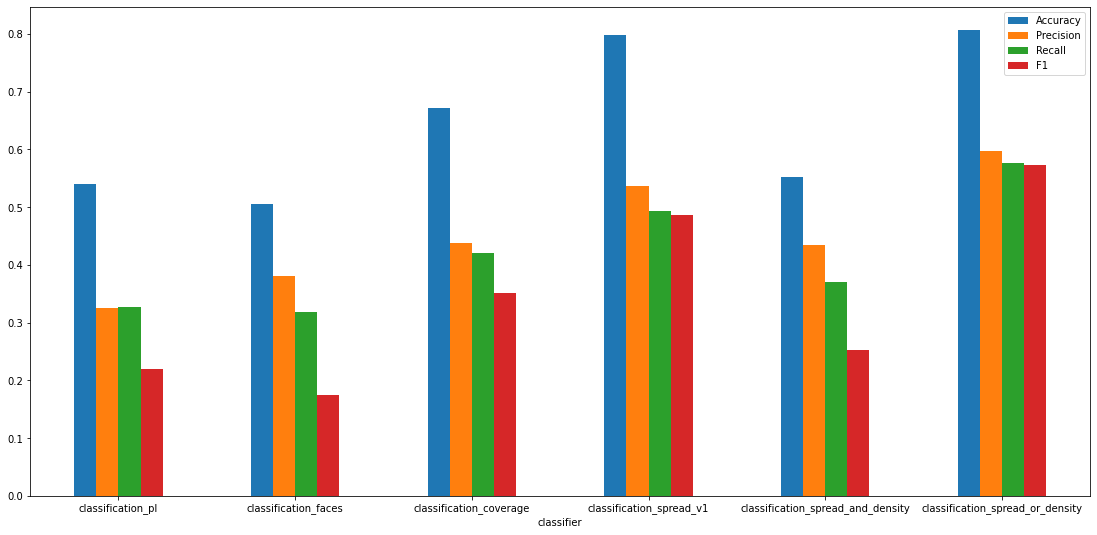

In [11]:

ax1 = avg_results_df.plot.bar(rot=0,figsize=(19,9))

We can observe that the last classifier i.e 'classifier_spread_or_density' has the best accuracy along with the best average performance of all other indicators of Pr, Recall, and F1 score.

For the next part of the question, We only calculate the metrics for OOT labels. For this we just have to choose from the relevant OOT rows from the already calculated confusion matrices and plot the results

In [12]:
#OOT performance
oot_results_dict= {'classifier':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}
for classifier in classifier_metrics_df_list:
    oot_results_dict['classifier'].append(classifier.name)
    oot_results_dict['Accuracy'].append(classifier.loc['OOT']['Acc'])
    oot_results_dict['Precision'].append(classifier.loc['OOT']['Pr'])
    oot_results_dict['Recall'].append(classifier.loc['OOT']['Rc'])
    oot_results_dict['F1'].append(classifier.loc['OOT']['F1'])
oot_results_df = pd.DataFrame(oot_results_dict)
oot_results_df.set_index('classifier',inplace=True)
oot_results_df

,Accuracy,Precision,Recall,F1
classifier,,,,
classification_pl,0.884372,0.090909,0.000543,0.001080
classification_faces,0.884498,0.315789,0.003261,0.006455
classification_coverage,0.883685,0.236842,0.004891,0.009585
classification_spread_v1,0.876118,0.318766,0.067391,0.111261
classification_spread_and_density,0.877243,0.281139,0.042935,0.074493
classification_spread_or_density,0.878869,0.453410,0.256522,0.327664


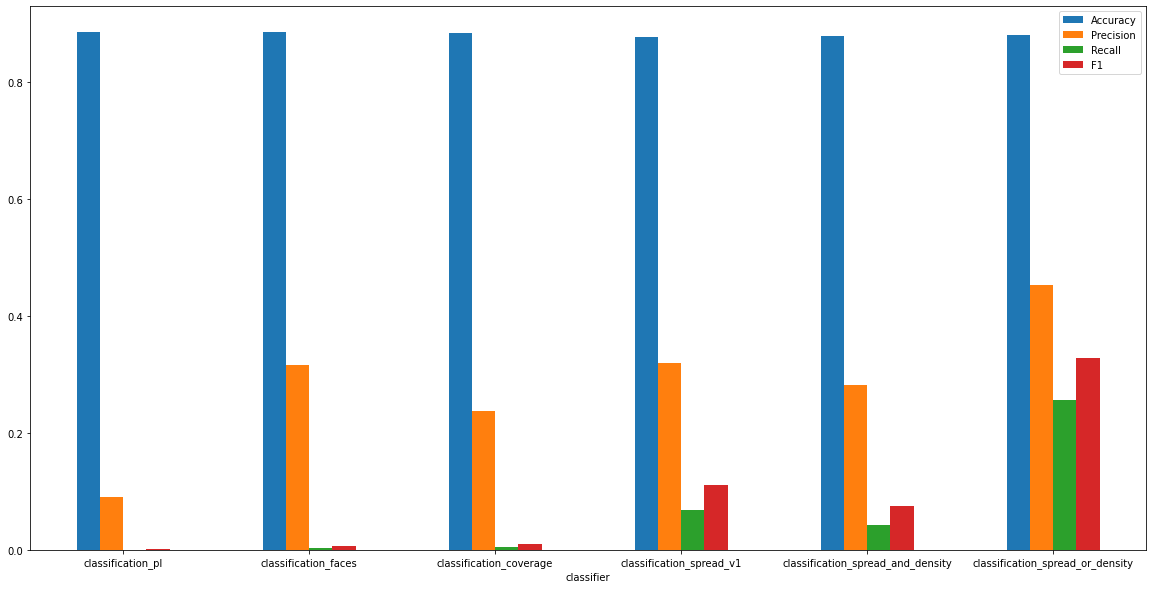

In [13]:
ax2 = oot_results_df.plot.bar(rot=0,figsize=(20,10))

We again see that the last classifier performs best overall.

We now only get the rows that belong to the trade: MEP from the clean_df and run the exact same operations we ran on clean_df to generate new confusion metrices

In [14]:
met_df = clean_df.loc[clean_df['trade'] == 'MEP' ]
classifier_metrics_df_list = []
zeros = [0.00,0.00,0.00]
for col in met_df.columns[2:8]:
    print('\nclassifier: ',col)
    unique_value_list = ['BC','NB','OOT']
    for val in unique_value_list:
        c = (met_df[col].values == val).sum()
        print(val,':',c, )
    init_dict  = {'class':unique_value_list,'TP':zeros,'TN':zeros,'FP':zeros,'FN':zeros,'Acc':zeros,'Pr':zeros,'Rc':zeros,'F1':zeros}
    classifier_df = pd.DataFrame(init_dict)
    classifier_df = classifier_df.set_index('class')
    classifier_df.name = col
    classifier_metrics_df_list.append(classifier_df)



classifier:  classification_pl
BC : 671
NB : 8378
OOT : 3

classifier:  classification_faces
BC : 323
NB : 8728
OOT : 1

classifier:  classification_coverage
BC : 3597
NB : 5446
OOT : 9

classifier:  classification_spread_v1
BC : 7233
NB : 1638
OOT : 181

classifier:  classification_spread_and_density
BC : 617
NB : 8414
OOT : 21

classifier:  classification_spread_or_density
BC : 6717
NB : 1683
OOT : 652


In [15]:
len_of_met_data = len(met_df)
def f(row):    
    for classifier in classifier_metrics_df_list:
        classifier_name = classifier.name
        for class_name in ['BC','NB','OOT']:
            if row[classifier_name]==class_name:
                if row['label']==class_name:
                    classifier.loc[class_name]['TP'] += 1
                else:
                    classifier.loc[class_name]['FP'] += 1
            else:
                if row['label']==class_name:
                    classifier.loc[class_name]['FN'] += 1
                else:
                    classifier.loc[class_name]['TN'] += 1

        

met_df.apply(f, axis=1)
print('finished processing %d rows' % len_of_met_data)

finished processing 9052 rows


In [16]:
for classifier in classifier_metrics_df_list:
    for class_name in ['BC','NB','OOT']:
        classifier.loc[class_name]['Acc'] = (classifier.loc[class_name]['TP'] + classifier.loc[class_name]['TN'])/len_of_met_data
        classifier.loc[class_name]['Pr'] = classifier.loc[class_name]['TP'] / (classifier.loc[class_name]['TP']+classifier.loc[class_name]['FP'])
        classifier.loc[class_name]['Rc'] = classifier.loc[class_name]['TP'] / (classifier.loc[class_name]['TP']+classifier.loc[class_name]['FN'])
        classifier.loc[class_name]['F1'] = 2*( classifier.loc[class_name]['Pr']*classifier.loc[class_name]['Rc']) / (classifier.loc[class_name]['Pr']+classifier.loc[class_name]['Rc'])
    #print(classifier)
    print(classifier.name,'\n',classifier,'\n')

classification_pl 
            TP      TN      FP      FN       Acc        Pr        Rc        F1
class                                                                        
BC      515.0  2712.0   156.0  5669.0  0.356496  0.767511  0.083279  0.150255
NB     1590.0   593.0  6788.0    81.0  0.241162  0.189783  0.951526  0.316449
OOT       0.0  7852.0     3.0  1197.0  0.867433  0.000000  0.000000       NaN 

classification_faces 
            TP      TN      FP      FN       Acc        Pr        Rc        F1
class                                                                        
BC      243.0  2788.0    80.0  5941.0  0.334843  0.752322  0.039295  0.074689
NB     1641.0   294.0  7087.0    30.0  0.213765  0.188016  0.982047  0.315607
OOT       0.0  7854.0     1.0  1197.0  0.867654  0.000000  0.000000       NaN 

classification_coverage 
            TP      TN      FP      FN       Acc        Pr        Rc        F1
class                                                                

<ipython-input-16-91b107ec1d42>:6: RuntimeWarning: invalid value encountered in double_scalars
  classifier.loc[class_name]['F1'] = 2*( classifier.loc[class_name]['Pr']*classifier.loc[class_name]['Rc']) / (classifier.loc[class_name]['Pr']+classifier.loc[class_name]['Rc'])
<ipython-input-16-91b107ec1d42>:6: RuntimeWarning: invalid value encountered in double_scalars
  classifier.loc[class_name]['F1'] = 2*( classifier.loc[class_name]['Pr']*classifier.loc[class_name]['Rc']) / (classifier.loc[class_name]['Pr']+classifier.loc[class_name]['Rc'])


In [17]:
#Computing Average performance scores for class MET
avg_met_results_dict= {'classifier':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}
for classifier in classifier_metrics_df_list:
    avg_met_results_dict['classifier'].append(classifier.name)
    avg_met_results_dict['Accuracy'].append(classifier['Acc'].sum()/3)
    avg_met_results_dict['Precision'].append(classifier['Pr'].sum()/3)
    avg_met_results_dict['Recall'].append(classifier['Rc'].sum()/3)
    avg_met_results_dict['F1'].append(classifier['F1'].sum()/3)
avg_met_results_df = pd.DataFrame(avg_met_results_dict)
avg_met_results_df.set_index('classifier',inplace=True)
avg_met_results_df
    

,Accuracy,Precision,Recall,F1
classifier,,,,
classification_pl,0.488364,0.319098,0.344935,0.155568
classification_faces,0.472087,0.313446,0.340447,0.130099
classification_coverage,0.663647,0.407231,0.451757,0.342944
classification_spread_v1,0.828620,0.592552,0.523357,0.515868
classification_spread_and_density,0.484902,0.436800,0.349373,0.153941
classification_spread_or_density,0.842908,0.648381,0.595442,0.609890


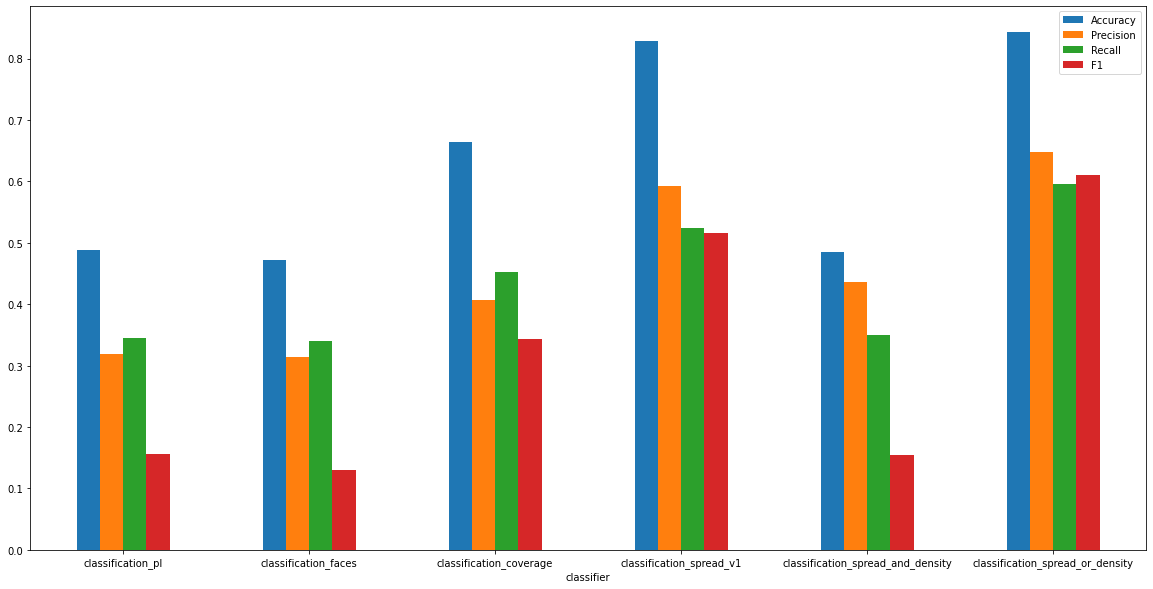

In [18]:

ax1 = avg_met_results_df.plot.bar(rot=0,figsize=(20,10))

Even here, for all entries that belong to MET, we observe that the 4th and last classifiers are relatively better than the others i.e classification_spread_v1, and classificaiton_spread_or_density. We can say that the last classifier performs best in this case as well since the other metrics of Precision, Recall, and F1 are also a bit higher as compared to the 4th classifier